In [1]:
import numpy as np
from scipy.integrate import Radau as RK

In [4]:
def geodesic(tau, y):
    """
    y[0] = t
    y[1] = dt
    y[2] = r
    y[3] = dr
    y[4] = phi
    y[5] = dphi
    y[6] = mass
    
    F[0] = dt
    F[1] = d^2t
    F[2] = dr
    F[3] = d^2r
    F[4] = dphi
    F[5] = d^2phi
    F[6] = mass change (0)
    """
    F = np.zeros_like(y, dtype=float)
    G = 1
    c = 1
    M = y[6]
    R = (2*G*M)/c**2
    F[0] = y[1]
    F[1] = -(R/((y[2]**2)*(1-(R/y[2]))))*y[3]*y[1]
    F[2] = y[3]
    F[3] = (y[2]-R)*y[5]**2 + (y[3]**2)*(R/(2*(y[2]**2)*(1-(R/y[2])))) - ((G*M)/y[2]**2)*(1-(R/y[2]))*y[1]**2
    F[4] = y[5]
    F[5] = -(2/y[2])*y[3]*y[5]
    F[6] = 0
    
    return F

In [5]:
def initial_y(t,r,phi,m):
    y = np.zeros(shape = (7), dtype = float)
    G = 1
    c = 1
    R = (2*G*m)/c**2
    dphi = (np.sqrt((G*m)/r))/r
    y[0] = t
    y[1] = np.sqrt((c**2+((r**2)*(dphi**2)))/(1-R/r))
    y[2] = r
    y[3] = 0
    y[4] = phi
    y[5] = dphi
    y[6] = m
    return y

#y = initial_y(0,1.5e+11,0,1.99e+30)
#geodesic(0, y)
#y

In [7]:
y = initial_y(0,500,np.pi/2,10)
#print(y)
#y = (0,4.46e+15,1.5e+11,-1000000000,0,2.97e+4,1.99e+30)
runga = RK(fun = geodesic, t0 = 0, y0 = y, t_bound = 20000, max_step = 100, first_step = 0.1, atol = 1e-8, rtol = 1e-8)
y_values = [y]
t_values = [0]
num = 0
while(1>0):
    # get solution step state
    runga.step()
    y_values.append(runga.y)
    print(runga.y)
    t_values.append(runga.t)
    # break loop after modeling is finished
    num+=1
    print(num)
    print(runga.status)
    if runga.status == 'finished':
        break
print(y_values)
print(len(y_values))
print(t_values)
np.shape(y)

[ 1.03077641e-01  1.03077641e+00  5.00000000e+02 -2.40000000e-07
  1.57082461e+00  2.82842712e-04  1.00000000e+01]
1
running
[ 1.13385405e+00  1.03077641e+00  4.99999999e+02 -2.63999997e-06
  1.57110745e+00  2.82842714e-04  1.00000000e+01]
2
running
[ 1.14416182e+01  1.03077642e+00  4.99999852e+02 -2.66399667e-05
  1.57393588e+00  2.82842880e-04  1.00000000e+01]
3
running
[ 1.14519306e+02  1.03077768e+00  4.99985189e+02 -2.66606649e-04
  1.60222077e+00  2.82859470e-04  1.00000000e+01]
4
running
[ 2.17597223e+02  1.03078100e+00  4.99946536e+02 -5.06411199e-04
  1.63050868e+00  2.82903210e-04  1.00000000e+01]
5
running
[ 3.20675574e+02  1.03078638e+00  4.99883917e+02 -7.45907636e-04
  1.65880232e+00  2.82974091e-04  1.00000000e+01]
6
running
[ 4.23754567e+02  1.03079382e+00  4.99797370e+02 -9.84949885e-04
  1.68710440e+00  2.83072102e-04  1.00000000e+01]
7
running
[ 5.26834407e+02  1.03080331e+00  4.99686947e+02 -1.22339173e-03
  1.71541764e+00  2.83197224e-04  1.00000000e+01]
8
running


(7,)

: 

[500.         499.99999999 499.99999855 499.99985215 499.98518907
 499.94653622 499.8839171  499.79736983 499.68694714 499.55271638
 499.39475956 499.21317336 499.00806917 498.77957309 498.52782602
 498.25298363 497.95521647 497.63470998 497.29166452 496.92629545
 496.53883319 496.12952322 495.6986262  495.24641797 494.77318964
 494.27924763 493.76491373 493.23052513 492.67643451 492.10301006
 491.51063551 490.89971021 490.27064913 489.62388292 488.95985789
 488.27903605 487.58189514 486.86892856 486.14064543 485.39757052
 484.64024423 483.8692225  483.08507681 482.28839404 481.4797764
 480.65984129 479.82922117 478.9885634  478.13853007 477.27979775
 476.41305729 475.53901358 474.6583852  473.77190414 472.88031547
 471.98437689 471.0848584  470.18254177 469.27822011 468.37269731
 467.46678751 466.56131443 465.65711081 464.75501767 463.8558836
 462.96056398 462.06992017 461.18481866 460.30613017 459.43472868
 458.57149047 457.71729309 456.87301427 456.03953081 455.21771745
 454.4084456

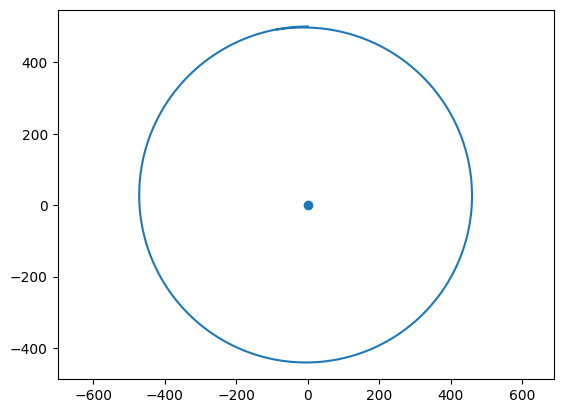

In [54]:
import matplotlib.pyplot as plt
y_values = np.array(y_values)
r = y_values[:,2]
phi = y_values[:,4]
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x,y)
plt.axis('equal')
plt.scatter(0,0)
print(r)
print(phi)


C:\Users\bryce\AppData\Local\Temp\ipykernel_30712\3942994842.py:8: RuntimeWarning: invalid value encountered in sqrt
  y[1] = np.sqrt((c**2+((r**2)*(dphi**2)))/(1-R/r))


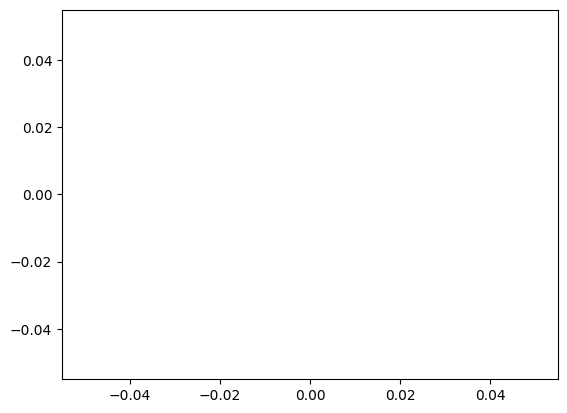

In [253]:
def rungaKutta(y,h):
    k1 = h * geodesic(0,y)
    k2 = h * geodesic(0,y + 0.5*k1)
    k3 = h * geodesic(0,y + 0.5*k2)
    k4 = h * geodesic(0,y + k3)    
    return (y + k1/6. + k2/3. + k3/3. + k4/6.)
y = initial_y(0,1.5e+11,0,1.99e+30)
y_vals = []
for i in range(100):
     y = rungaKutta(y, 1000)
     y_vals.append(y)
y_vals = np.array(y_vals)
r = y_vals[:,2]
phi = y_vals[:,4]
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x,y)
     

In [35]:
a = np.array([1,2,3,4])
b = np.array([4,3,2,1])
c = np.dot(a,b)
r = 100
R = 30
g = np.array([1-R/r, -1/(1-R/r), -r**2])
U = np.array([20, 10, 1])
res = np.dot(g,U)
res

-10000.285714285714

Text(0.5, 1.0, '$c^2$')

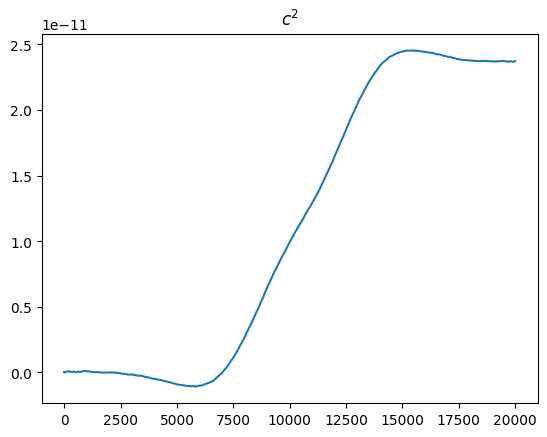

In [57]:
G = 1
c = 1
r = y_values[:,2]
M = y_values[0,6]
R = (2*G*M)/(c**2)
c_conserve = (1-R/r)*y_values[:,1]**2 - (1/(1-R/r))*y_values[:,3]**2 - r**2 * y_values[:,5]**2
c_conserve_perc = ((c_conserve - c_conserve[0])/c_conserve[0])*100

plt.plot(t_values, c_conserve_perc)
plt.title("$c^2$")

Period = 1991111111111111.0 Seconds
Semi Major Axis = 10000000000.0 Meters
Expected Kepler's 3rd Law ratio = 3.947841760435743
Computed Kepler's 3rd Law ratio = 3.964523456790123
[1.e+10 1.e+10 1.e+10 ... 1.e+10 1.e+10 1.e+10]


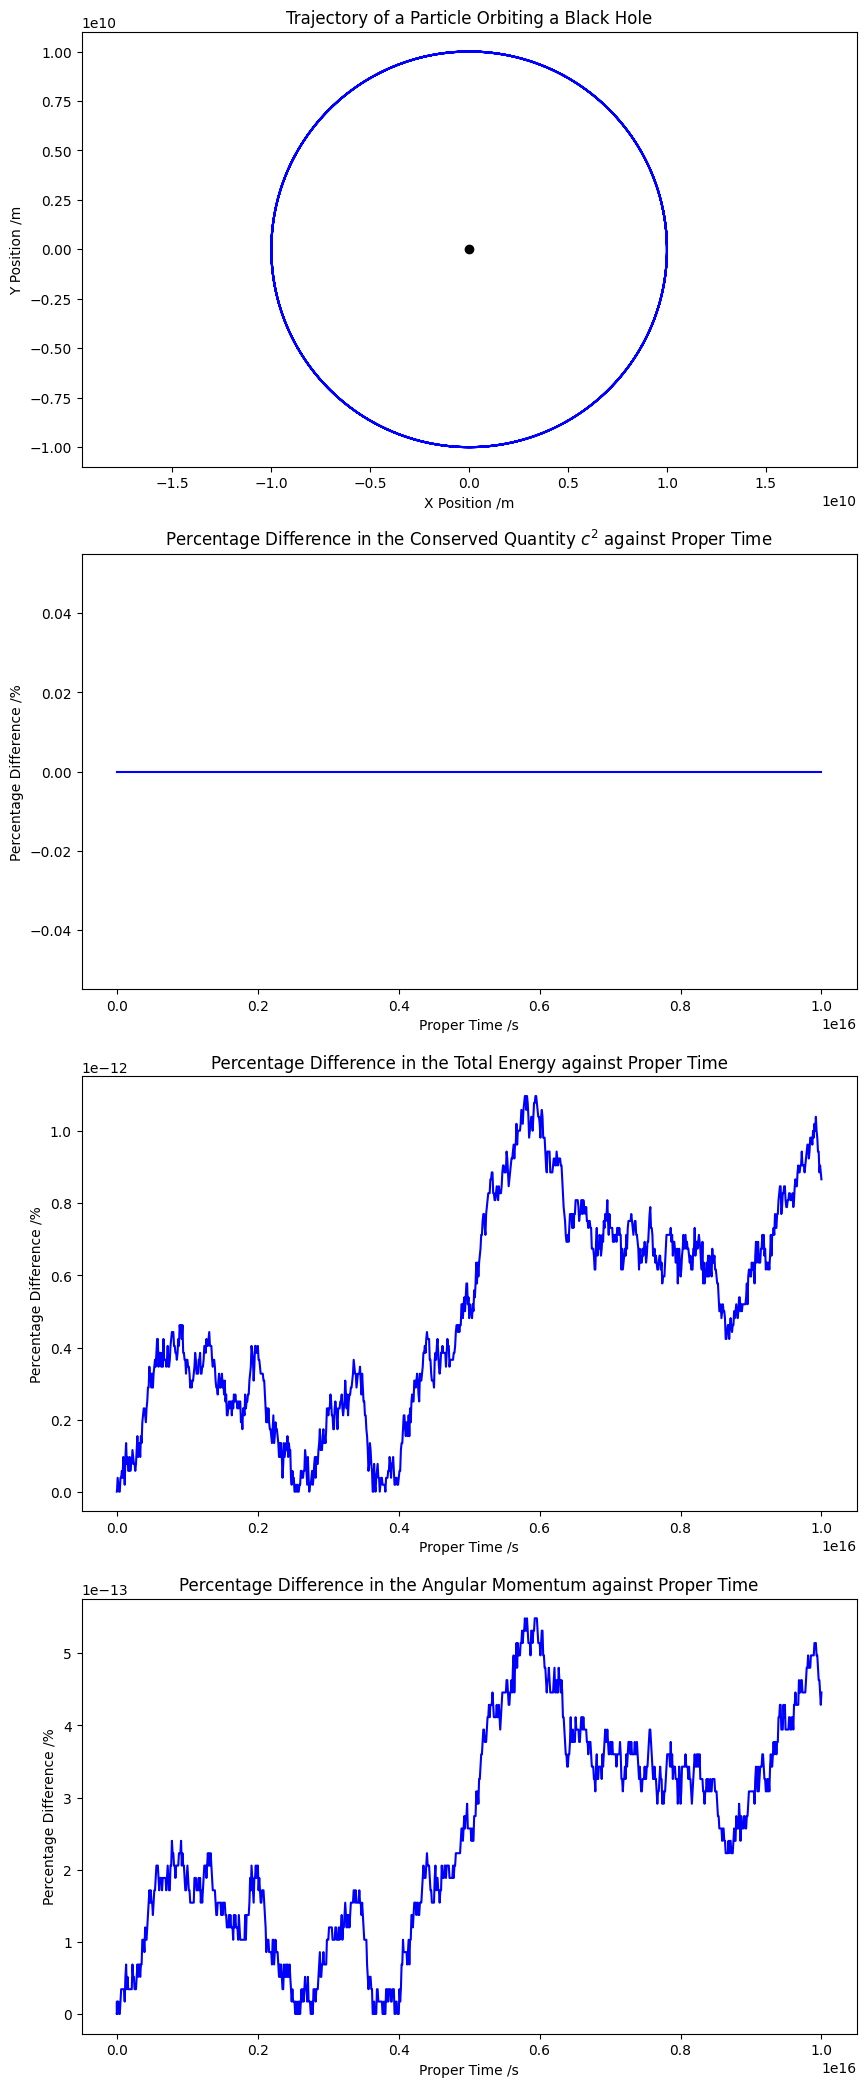

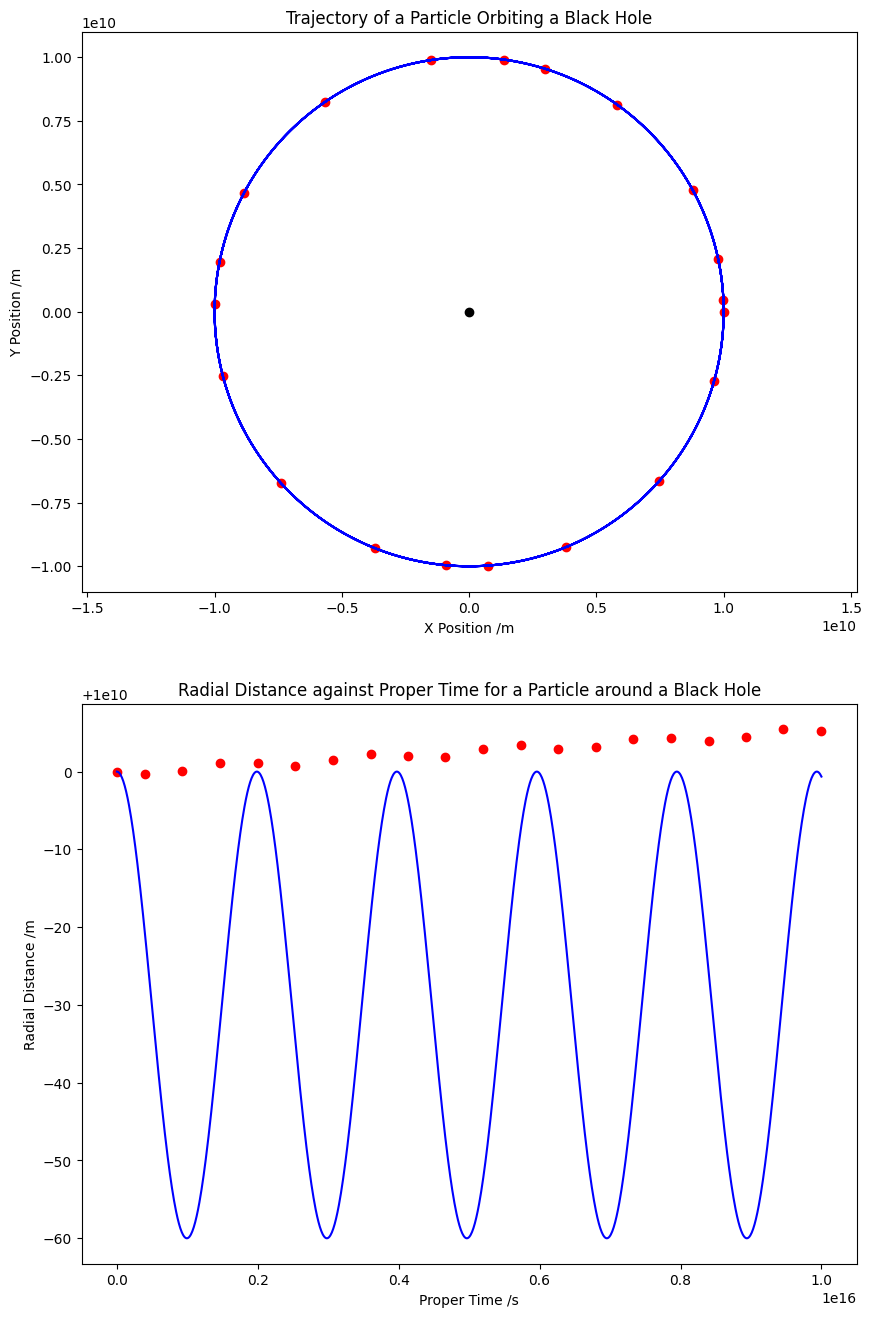

In [1]:
import numpy as np
import blackhole_main as bh
bh.trajectory(input_file_dir = 'C:/Users/bryce/downloads/bh_inputs_kep.yaml')

c:\Users\bryce\Python\Computational\assessment3\blackhole_main.py:166: RuntimeWarning: invalid value encountered in divide
  ang_mom_perc = np.sqrt(((ang_mom - ang_mom[0])/ang_mom[0])**2) * 100


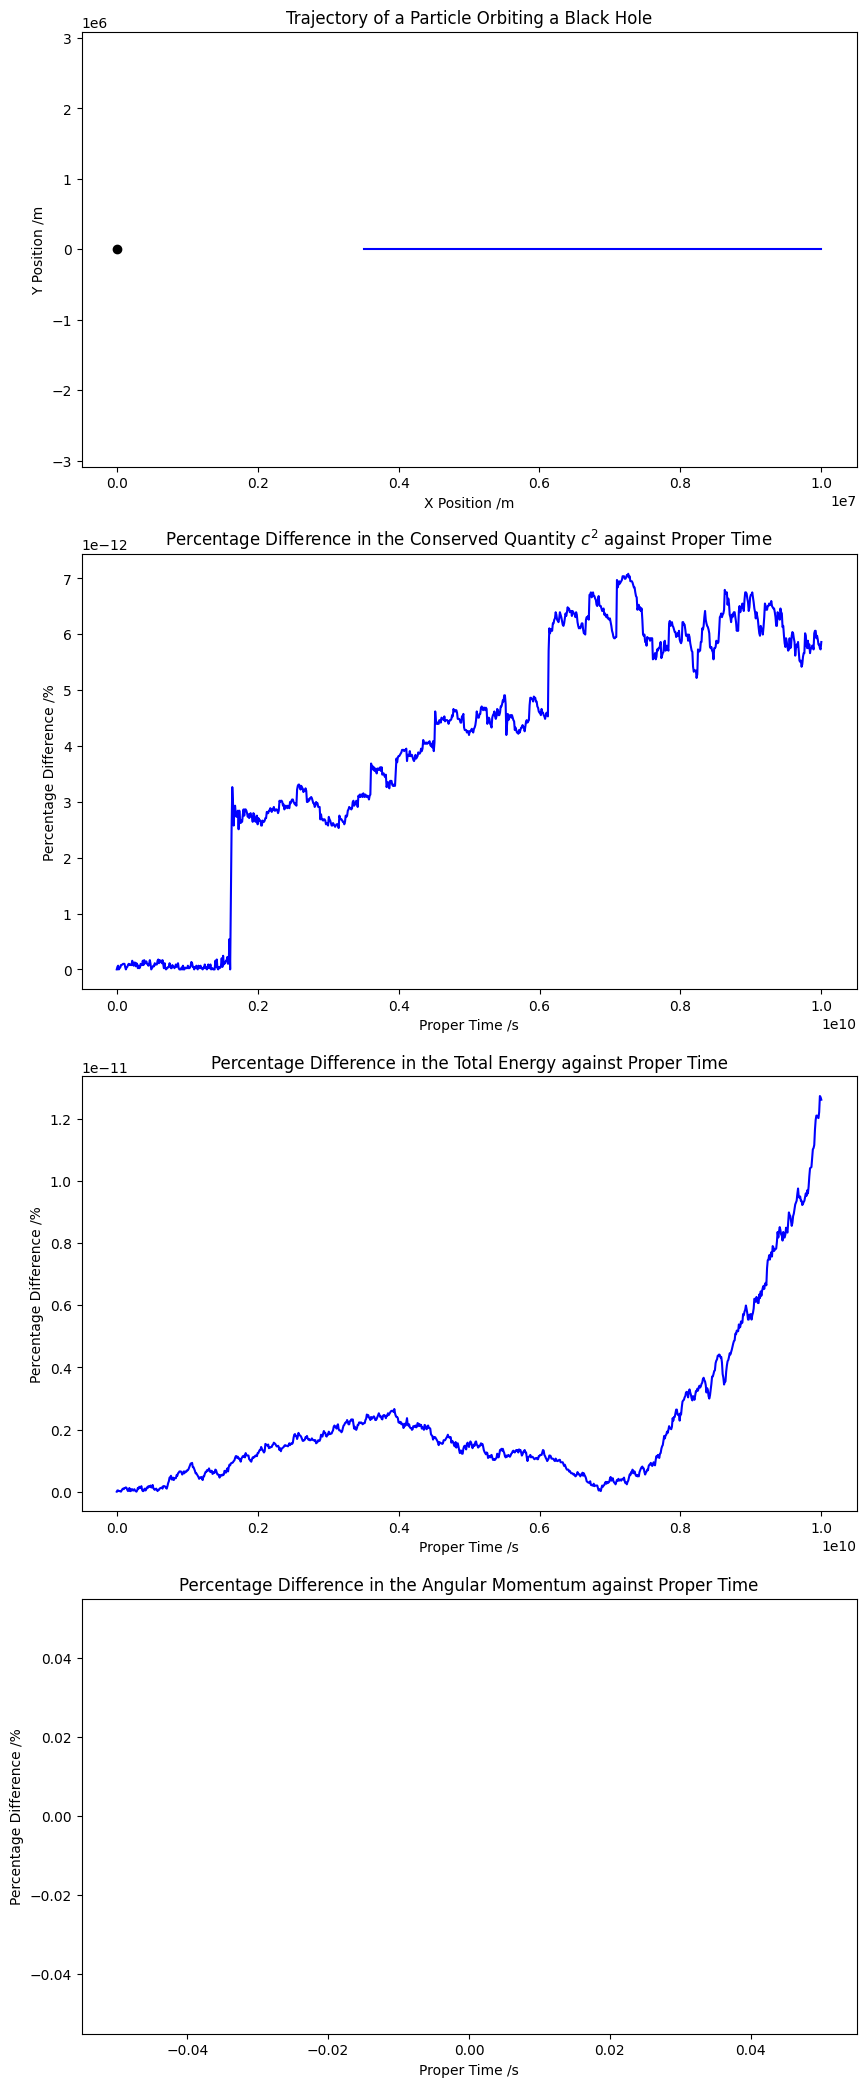

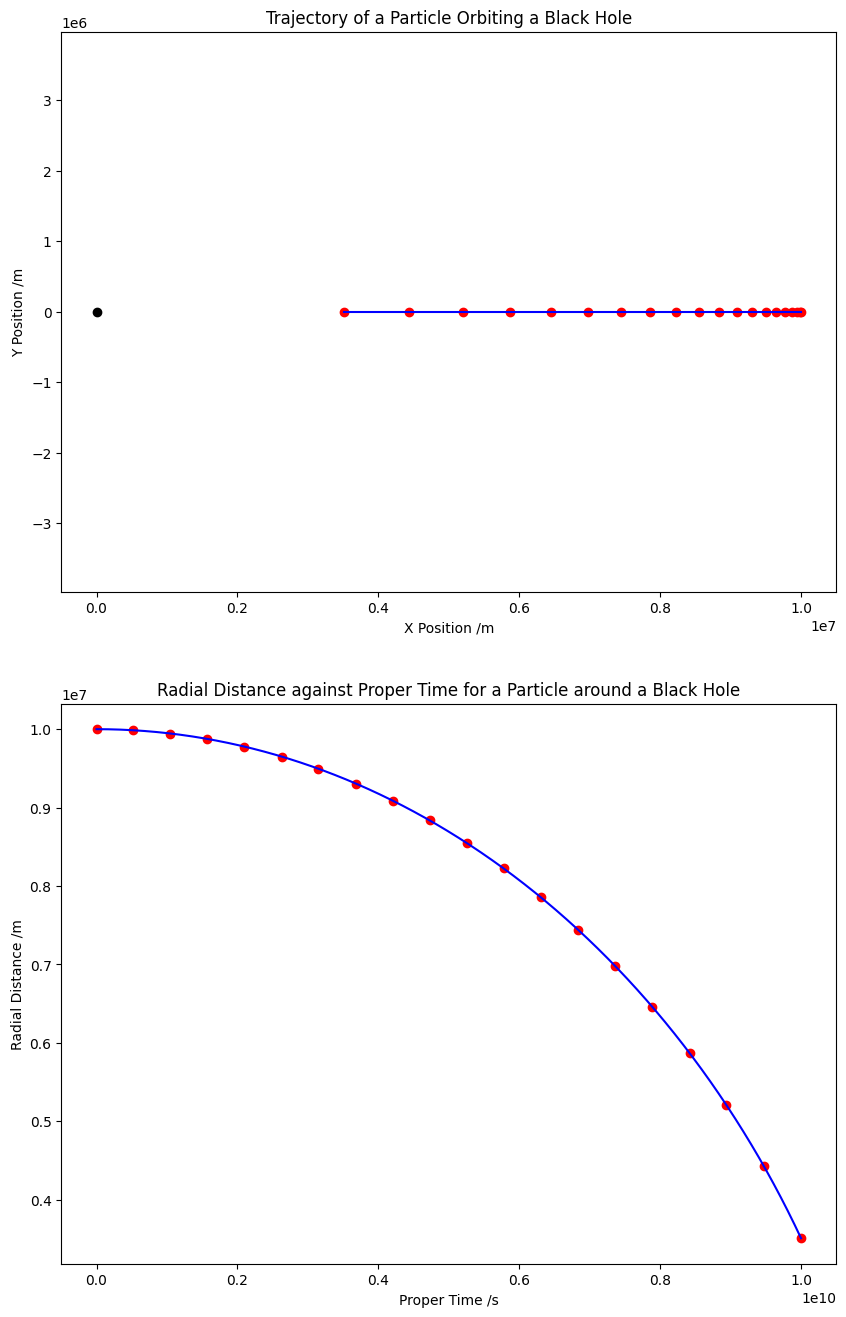

In [2]:
import numpy as np
import blackhole_main as bh
bh.trajectory(input_file_dir = 'C:/Users/bryce/downloads/bh_inputs.yaml')

In [29]:
import yaml
file = open('C:/Users/bryce/downloads/bh_inputs.yaml', 'r')
loaded = yaml.safe_load(file)
loaded['save_directory']

'C:/Users/bryce/downloads'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
a = np.array([1,2,3,4])
b = np.zeros(5)
b[0] = a

ValueError: setting an array element with a sequence.

In [3]:
int(3.9)

3